## Machine Learning - Classification - Course Project

The course project will both review John Hollinger's NBA Advanced Statistics, by player, and attempt to create a classifier where the Advanced Statistics will be used to attempt to classify a player's salary. The salary will be broken into different 'bands'

****Data dictionary****:

Each observation represents an individual player's Hollinger stats for that season. Columns and their appropriate definition follows as detailed by ESPN.com are as follows:

rank that player's PER rank for that given season

ts% True Shooting Percentage - what a player's shooting percentage would be if we accounted for free throws and 3-pointers. True Shooting Percentage = Total points / [(FGA + (0.44 x FTA)]

ast Assist Ratio - the percentage of a player's possessions that ends in an assist. Assist Ratio = (Assists x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

to Turnover Ratio - the percentage of a player's possessions that end in a turnover. Turnover Ratio = (Turnover x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

usg Usage Rate - the number of possessions a player uses per 40 minutes. Usage Rate = {[FGA + (FT Att. x 0.44) + (Ast x 0.33) + TO] x 40 x League Pace} divided by (Minutes x Team Pace)

orr Offensive rebound rate

drr Defensive rebound rate

rebr Rebound Rate - the percentage of missed shots that a player rebounds. Rebound Rate = (100 x (Rebounds x Team Minutes)) divided by [Player Minutes x (Team Rebounds + Opponent Rebounds)]

per Player Efficiency Rating is the overall rating of a player's per-minute statistical production. The league average is 15.00 every season.

va Value Added - the estimated number of points a player adds to a teamâ€™s season total above what a 'replacement player' (for instance, the 12th man on the roster) would produce. Value Added = ([Minutes * (PER - PRL)] / 67). PRL (Position Replacement Level) = 11.5 for power forwards, 11.0 for point guards, 10.6 for centers, 10.5 for shooting guards and small forwards

ewa Estimated Wins Added - Value Added divided by 30, giving the estimated number of wins a player adds to a team's season total above what a 'replacement player' would produce.

PER - sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance

Player Salary - the player's salary (short of any bonuses etc) for the season

### Objective

The objective of this assignment is to use advanced statistics, from John hollinger's advanced NBA  Statistics, in an attempt to both understand whether a players performance (per advanced statistics) is indicitive of their compensation

To determine this, the following input statistics will be used from Hollinger's NBA advanced statistics:

1. ts% True Shooting Percentage - what a player's shooting percentage would be if we accounted for free throws and 3-pointers. True Shooting Percentage = Total points / [(FGA + (0.44 x FTA)]

2. ast Assist Ratio - the percentage of a player's possessions that ends in an assist. Assist Ratio = (Assists x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

3. to Turnover Ratio - the percentage of a player's possessions that end in a turnover. Turnover Ratio = (Turnover x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

4. usg Usage Rate - the number of possessions a player uses per 40 minutes. Usage Rate = {[FGA + (FT Att. x 0.44) + (Ast x 0.33) + TO] x 40 x League Pace} divided by (Minutes x Team Pace)

5. orr Offensive rebound rate

6. drr Defensive rebound rate

7. rebr Rebound Rate - the percentage of missed shots that a player rebounds. Rebound Rate = (100 x (Rebounds x Team Minutes)) divided by [Player Minutes x (Team Rebounds + Opponent Rebounds)]

8. Minutes per game (mpg): the amount a player plays - affects usage and efficiency

The input statistics will be used in an attempt to classify the players season copensation - can we classify a player into an earning band via analysis of their advanced statistics?

### Data Loading & Cleaning - Hollinger Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits as mp
import mpl_toolkits
import seaborn as sns
sns.set()

In [2]:
# read in the data:
# data downloaded and saved as a csv from Kaggle datasets
data = pd.read_csv('hollingersStats.csv')
data.head()

,Unnamed: 0,rank,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,player,team,season
0,1,1,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,31.01,452.0,15.1,Tracy McGrady,ORL,2002-03
1,2,2,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,29.43,356.2,11.9,Shaquille O'Neal,LAL,2002-03
2,3,3,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,27.07,420.6,14.0,Kobe Bryant,LAL,2002-03
3,4,4,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,26.46,370.8,12.4,Kevin Garnett,MIN,2002-03
4,5,5,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,26.46,355.0,11.8,Tim Duncan,SA,2002-03


In [3]:
# can drop data unnamed, rank - the variables will have no meaning for the further analysis
# can drop per, va - will use ewa as a summary statistic (denoting how many wins a player addsa bove/beyond a replacement palyer)
adv_stats = data[['gp', 'mpg', 'ts%', 'ast', 'to', 'usg', 'orr', 'drr', 'rebr', 'ewa', 'player', 'season']]
adv_stats.head()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season
0,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,15.1,Tracy McGrady,2002-03
1,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,11.9,Shaquille O'Neal,2002-03
2,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,14.0,Kobe Bryant,2002-03
3,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,12.4,Kevin Garnett,2002-03
4,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,11.8,Tim Duncan,2002-03


In [4]:
# get the shape of the data and data types
print('Number of Rows:' , adv_stats.shape[0])
print('Number of Columns', adv_stats.shape[1])
adv_stats.info()

Number of Rows: 5404
Number of Columns 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gp      5404 non-null   int64  
 1   mpg     5404 non-null   float64
 2   ts%     5404 non-null   float64
 3   ast     5404 non-null   float64
 4   to      5404 non-null   float64
 5   usg     5404 non-null   float64
 6   orr     5404 non-null   float64
 7   drr     5404 non-null   float64
 8   rebr    5404 non-null   float64
 9   ewa     5404 non-null   float64
 10  player  5404 non-null   object 
 11  season  5404 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 506.8+ KB


Note that for all entries (5404 rows/records) there are non-null values

In [5]:
# get the unique seasons the dataset covers
print(len(data['season'].unique().tolist()), 'seasons')

16 seasons


In [6]:
# check data for null/missing values: already checked above, but again for completeness
check_na = adv_stats.isnull()

# get a count of null (True) vs non-null (False)
print('Minutes/Game: ', check_na['mpg'].value_counts())
print('True Shooting %: ', check_na['ts%'].value_counts())
print('Assists: ', check_na['ast'].value_counts())
print('Turnovers: ', check_na['to'].value_counts())
print('Usage: ', check_na['usg'].value_counts())
print('Offensive Rebounding: ', check_na['orr'].value_counts())
print('Defensive Rebounding: ', check_na['drr'].value_counts())
print('Rebound Rate: ', check_na['rebr'].value_counts())
print('EWA: ', check_na['ewa'].value_counts())
print('Player: ', check_na['player'].value_counts())
print('Season: ', check_na['season'].value_counts())

Minutes/Game:  False    5404
Name: mpg, dtype: int64
True Shooting %:  False    5404
Name: ts%, dtype: int64
Assists:  False    5404
Name: ast, dtype: int64
Turnovers:  False    5404
Name: to, dtype: int64
Usage:  False    5404
Name: usg, dtype: int64
Offensive Rebounding:  False    5404
Name: orr, dtype: int64
Defensive Rebounding:  False    5404
Name: drr, dtype: int64
Rebound Rate:  False    5404
Name: rebr, dtype: int64
EWA:  False    5404
Name: ewa, dtype: int64
Player:  False    5404
Name: player, dtype: int64
Season:  False    5404
Name: season, dtype: int64


The data shows all 5404 rows are populated for each feature of interest

In [7]:
# check the data type of each column
adv_stats.dtypes

gp          int64
mpg       float64
ts%       float64
ast       float64
to        float64
usg       float64
orr       float64
drr       float64
rebr      float64
ewa       float64
player     object
season     object
dtype: object

### Data Loading & Cleaning - Salary Data

In [8]:
salary_data = pd.read_csv('all_salaries.csv')
salary_data.head()

,Player,Team,Salary,Season,Abb,TEAM-SEASON
0,Shaquille O'Neal,Los Angeles Lakers,23571000,2003,LAL,LAL-2003
1,Juwan Howard,Denver Nuggets,20625000,2003,DEN,DEN-2003
2,Karl Malone,Utah Jazz,19250000,2003,UTA,UTA-2003
3,Dikembe Mutombo,New Jersey Nets,16105000,2003,BKN,BKN-2003
4,Damon Stoudamire,Portland Trail Blazers,13500000,2003,POR,POR-2003


In [9]:
# can remove Team, Team-Season, Abbv
salary_data = salary_data[['Player', 'Salary', 'Season']]
salary_data.head()

,Player,Salary,Season
0,Shaquille O'Neal,23571000,2003
1,Juwan Howard,20625000,2003
2,Karl Malone,19250000,2003
3,Dikembe Mutombo,16105000,2003
4,Damon Stoudamire,13500000,2003


In [10]:
# check data types of each column
salary_data.dtypes

Player    object
Salary     int64
Season     int64
dtype: object

In [11]:
#check to ensure there are no null values/empty rows
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7950 entries, 0 to 7949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  7950 non-null   object
 1   Salary  7950 non-null   int64 
 2   Season  7950 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 186.5+ KB


### Combining Data Sets: Advanced Stats & Salary

In [12]:
# based on data, need to trim data from season in adv_stats
adv_stats['season'] = adv_stats['season'].str[0:4]
adv_stats.head()

C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,player,season
0,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,15.1,Tracy McGrady,2002
1,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,11.9,Shaquille O'Neal,2002
2,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,14.0,Kobe Bryant,2002
3,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,12.4,Kevin Garnett,2002
4,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,11.8,Tim Duncan,2002


In [13]:
# check seasons for each data set to see if we need to reove data
print(adv_stats['season'].unique().tolist())
print(salary_data['Season'].unique().tolist())

['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [14]:
# looks as if adv_stats['season'] is an object, will need to change to a integer
adv_stats['season'] = adv_stats['season'].astype(str).astype(int)

C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# based on data, need to remove 2002 f/ adv_stats and 2018/2019 from salary_data
# for adv_stats
adv_stats = adv_stats[adv_stats['season'] != '2002']

# for salary_data
salary_data = salary_data[salary_data['Season'] != 2018][salary_data['Season'] != '2019']

C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [16]:
# Now left with 2 dataframes. Merge both, on Player and Season to align advanced stats with salary
salary_stats_data = adv_stats.merge(salary_data, how = 'inner', left_on = ['player', 'season'], right_on = ['Player', 'Season'])

# can drop the player/season columns
salary_stats_data = salary_stats_data.drop(['player', 'season', 'Player', 'Season'], axis = 1)

salary_stats_data.head()

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,Salary
0,82,39.4,0.547,16.8,8.7,27.1,9.0,30.0,20.1,14.5,25200000
1,69,36.6,0.534,11.6,10.0,27.1,10.0,27.6,19.0,9.6,12072000
2,67,39.9,0.526,15.8,7.7,30.9,4.0,13.3,8.5,10.8,12072000
3,67,36.8,0.578,12.0,11.9,23.9,11.0,24.4,17.7,8.4,23571000
4,65,37.6,0.551,17.2,8.9,27.0,5.0,12.0,8.3,8.4,12375000


In [17]:
# shape and information of the processed data frame
print('Shape: ', salary_stats_data.shape)
salary_stats_data.info()

Shape:  (4053, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4053 entries, 0 to 4052
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gp      4053 non-null   int64  
 1   mpg     4053 non-null   float64
 2   ts%     4053 non-null   float64
 3   ast     4053 non-null   float64
 4   to      4053 non-null   float64
 5   usg     4053 non-null   float64
 6   orr     4053 non-null   float64
 7   drr     4053 non-null   float64
 8   rebr    4053 non-null   float64
 9   ewa     4053 non-null   float64
 10  Salary  4053 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 380.0 KB


### Processing Data

In [18]:
# outliers: will only remove outliers from the gp (games played) data - but only for those with low gp, as being present/not present will skew the addition of value 
# Salary data will be kept as is, with the exception of reoving outliers  - values below the league CBA minimum salary
# High salaries will be retained in order to deterine if the top start justify their salary via performance

# get a summary of the data:
summary = salary_stats_data.describe()
summary

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,Salary
count,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4.053000e+03
mean,66.184308,25.328571,0.536975,16.119911,10.938712,18.360202,5.281396,14.903479,10.098569,3.886010,5.581269e+06
std,14.003836,7.770250,0.046953,8.030305,2.834330,4.924905,3.874435,6.040374,4.661527,4.929632,5.209618e+06
min,17.000000,7.000000,0.363000,1.800000,2.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,1.598400e+04
25%,58.000000,19.000000,0.508000,10.000000,9.100000,14.800000,2.000000,10.000000,6.200000,0.500000,1.658280e+06
50%,70.000000,25.500000,0.537000,14.300000,10.700000,18.000000,4.000000,13.800000,9.000000,2.400000,3.726600e+06
75%,78.000000,31.900000,0.567000,20.600000,12.400000,21.500000,8.000000,19.000000,13.500000,5.800000,8.000000e+06
max,85.000000,43.100000,0.725000,48.700000,29.600000,42.500000,22.000000,38.000000,26.700000,32.300000,3.096345e+07


In [19]:
# will remove low outliers from the gp and Salary data
# determine iqr for each feature
gp_q1 = summary.loc['25%', 'gp']
gp_q2 = summary.loc['50%', 'gp']
gp_q3 = summary.loc['75%', 'gp']
gp_iqr = gp_q3 - gp_q1

# remove rows from data frame based on - 1.5*iqr (low side outlier removal). Salary data will be removed if below the NBA 2003 minimum salary ($564,000)
# this helps eliminate players paid on short-term (10 day contracts)
salary_stats_data = salary_stats_data[salary_stats_data['gp'] >= gp_q1 - 1.5*gp_iqr]
salary_stats_data = salary_stats_data[salary_stats_data['Salary'] > 564000]
salary_stats_data = salary_stats_data[salary_stats_data['ewa'] > 0]
salary_stats_data = salary_stats_data[salary_stats_data['orr'] > 0]
salary_stats_data = salary_stats_data[salary_stats_data['drr'] > 0]
salary_stats_data = salary_stats_data[salary_stats_data['rebr'] > 0]

print('After removing low salary & gp outliers, negative ewa and rebounding rates: ', salary_stats_data.shape[0])

After removing low salary & gp outliers, negative ewa and rebounding rates:  3137


In [20]:
# next we will look at changing the Salary feature from numerial to a categorical/ordinal feature (Q1, Q2, Q3, Q4)
s1 = summary.loc['25%', 'Salary']
s2 = summary.loc['50%', 'Salary']
s3 = summary.loc['75%', 'Salary']
smax = summary.loc['max', 'Salary']
sal_class = []

for i in salary_stats_data['Salary']:
    if i < s1:
        sal_class.append(1)
    elif i >= s1 and i < s2:
        sal_class.append(2)
    elif i >= s2 and i < s3:
        sal_class.append(3)
    else:
        sal_class.append(4)
        
salary_stats_data['class'] = sal_class

In [21]:
salary_stats_data

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa,Salary,class
0,82,39.4,0.547,16.8,8.7,27.1,9.0,30.0,20.1,14.5,25200000,4
1,69,36.6,0.534,11.6,10.0,27.1,10.0,27.6,19.0,9.6,12072000,4
2,67,39.9,0.526,15.8,7.7,30.9,4.0,13.3,8.5,10.8,12072000,4
3,67,36.8,0.578,12.0,11.9,23.9,11.0,24.4,17.7,8.4,23571000,4
4,65,37.6,0.551,17.2,8.9,27.0,5.0,12.0,8.3,8.4,12375000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,72,16.8,0.534,13.8,10.4,13.8,3.8,10.1,6.9,0.4,7612172,3
3995,74,31.6,0.542,17.1,9.9,14.2,4.9,14.2,9.6,0.6,11233146,4
3997,39,26.6,0.543,18.1,11.8,8.7,7.8,12.2,9.9,0.2,2183072,2
4000,72,31.5,0.513,13.9,8.5,17.5,1.4,12.8,6.9,0.4,1015696,1


### Distribution of Data

In [22]:
# another summary of data
summary2 = salary_stats_data.describe().T
summary2

,count,mean,std,min,25%,50%,75%,max
gp,3137.0,6.836500e+01,1.257281e+01,28.000,61.000,72.000,79.000,8.500000e+01
mpg,3137.0,2.710143e+01,7.376215e+00,8.600,21.400,27.700,33.200,4.310000e+01
ts%,3137.0,5.470743e-01,4.094221e-02,0.397,0.519,0.545,0.573,7.250000e-01
ast,3137.0,1.589366e+01,7.924549e+00,1.800,9.800,14.000,20.500,4.530000e+01
to,3137.0,1.068419e+01,2.544632e+00,2.400,9.000,10.500,12.100,2.510000e+01
usg,3137.0,1.936819e+01,4.743424e+00,6.300,16.000,18.900,22.400,4.250000e+01
orr,3137.0,5.546605e+00,3.942677e+00,0.500,2.100,4.100,8.600,2.200000e+01
drr,3137.0,1.553806e+01,6.135458e+00,5.100,10.300,14.500,20.000,3.800000e+01
rebr,3137.0,1.054976e+01,4.745305e+00,2.900,6.400,9.600,14.200,2.670000e+01
ewa,3137.0,5.129200e+00,4.898554e+00,0.100,1.600,3.500,7.100,3.230000e+01


In [23]:
# will now look at the distribution of data with respect to each feature. Important to see if any features need transformation prior to scaling (or what type of scaling to use)

# split salary_stats_data into x and y data
xcols = ['gp', 'mpg', 'ts%', 'ast', 'to', 'usg', 'orr', 'drr', 'rebr', 'ewa']
ycol = 'class'
scol = 'Salary'

<AxesSubplot:ylabel='Frequency'>

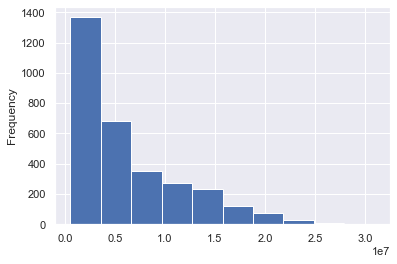

In [24]:
# will first lok at distribution of the Salary (s col) feature
s = salary_stats_data[scol]
s.plot.hist()

As we can see, a disporoprtionately large amount of the salry data is skewed towards lower salaries (there are a lot more role players than stars)

We will attempt to corroborate tnis by doing a value count on the ordinal class feature

In [25]:
# count on ordinal class feature
y = salary_stats_data[ycol]

# get a feature count
y_count = y.value_counts()
y_count_norm = y.value_counts(normalize = True)
print('Raw Counts: ', y_count)
print('Normalized: ', y_count_norm)

Raw Counts:  4    932
3    811
2    776
1    618
Name: class, dtype: int64
Normalized:  4    0.297099
3    0.258527
2    0.247370
1    0.197004
Name: class, dtype: float64


By binning/classifying data according to salary quartiles we've been able to create a reasonably balanced data set from quite imbalanced salary data

array([[<AxesSubplot:title={'center':'gp'}>,
        <AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'ts%'}>],
       [<AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'to'}>,
        <AxesSubplot:title={'center':'usg'}>],
       [<AxesSubplot:title={'center':'orr'}>,
        <AxesSubplot:title={'center':'drr'}>,
        <AxesSubplot:title={'center':'rebr'}>],
       [<AxesSubplot:title={'center':'ewa'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

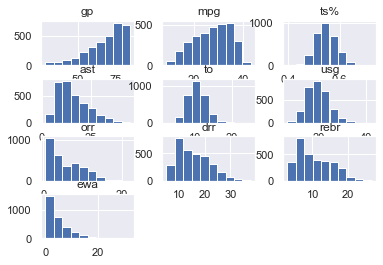

In [26]:
# next, lets look at distributions of each feature, to investigate what type of scaling is appropriate prior to classification
x = salary_stats_data[xcols]

# plot a histogram of each feature
x.hist()

In my literature reviews (Python Machine Learning) it suggests that standardizing data is more beneficial than min/max scaling for classification mehtods. So, we will transform data to get the distributions normal and then use standard scaling

As seen, some features are close to nomally distributed, while ost others are not. We will use a boxcox transformation, to get each feature as close to normally distributed as possible befoe standardizing

In [27]:
# box cox transformation of the indepdentdent variables/features (x)
from scipy.stats import boxcox

# will need to perform transformation on each series and concatenate into a dataframe
cols = x.columns.tolist()
x_bc = pd.DataFrame()
for col in cols:
    a = pd.Series(boxcox(x[col])[0])
    x_bc[col] = a
x_bc

,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,ewa
0,585680.522410,99.743477,-0.616584,3.534304,3.045367,7.094588,2.527227,3.863212,3.359839,3.688155
1,332287.668635,90.337191,-0.641725,2.978200,3.317502,7.094588,2.666659,3.756522,3.289716,2.962528
2,301696.227400,101.447208,-0.657524,3.439952,2.815941,7.628463,1.513150,2.849751,2.318768,3.162840
3,301696.227400,91.001356,-0.559129,3.027793,3.673792,6.610026,2.794376,3.600032,3.201825,2.741867
4,273120.499222,93.670006,-0.608977,3.570718,3.089008,7.079966,1.782060,2.725855,2.290898,2.741867
...,...,...,...,...,...,...,...,...,...,...
3132,382124.108017,31.507262,-0.641725,3.235000,3.396218,4.766276,1.452385,2.520311,2.076327,-0.826611
3133,418095.508729,74.137813,-0.626177,3.561682,3.297479,4.852146,1.757405,2.929111,2.461984,-0.482102
3134,51040.278574,58.773051,-0.624251,3.650101,3.656075,3.512522,2.340757,2.745702,2.498401,-1.346350
3135,382124.108017,73.822043,-0.683757,3.245826,3.001018,5.512201,0.343621,2.803485,2.076327,-0.826611


array([[<AxesSubplot:title={'center':'gp'}>,
        <AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'ts%'}>],
       [<AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'to'}>,
        <AxesSubplot:title={'center':'usg'}>],
       [<AxesSubplot:title={'center':'orr'}>,
        <AxesSubplot:title={'center':'drr'}>,
        <AxesSubplot:title={'center':'rebr'}>],
       [<AxesSubplot:title={'center':'ewa'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

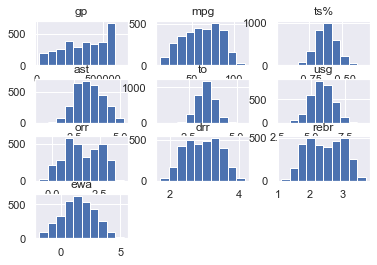

In [28]:
# now plot a histogram of the boxcox transformed features
x_bc.hist()

#### Correlation Between Data & Features

Since one of the models we will be using is a Logistic regression, let's check correlations between features and the numerical salary output

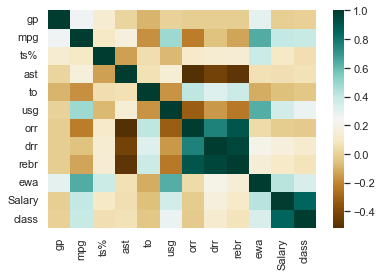

In [29]:
corr_x_s = salary_stats_data.corr()

# plot the heatmap
hm = sns.heatmap(corr_x_s, cmap = 'BrBG')

Salary has somewhere between low and high correlation with each of the variables. this will liekly increase when binning

#### Standardize Data & Train Test Splits

In [30]:
# remebering that the vatiables/targets we will be classifying on are y and x_bc (boxcox transformed x variables)
# use the stratified shuffle split to ensure that each class keeps its balance

from sklearn.model_selection import StratifiedShuffleSplit
features = x_bc.columns

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

# call split method and pass x, y values. next calls the train/test indices
train_idx, test_idx = next(strat_shuf_split.split(x_bc, y))

# Create the dataframes
x_bc_train = x_bc.loc[train_idx, features]
y_train = y.iloc[train_idx]

x_bc_test  = x_bc.loc[test_idx, features]
y_test  = y.iloc[test_idx]

print('x train: ', x_bc_train.shape)
print('x test:', x_bc_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (2195, 10)
x test: (942, 10)
y train:  (2195,)
y test:  (942,)


In [31]:
# check value counts of y_train and y_test, normalized
print('y train: ', y_train.value_counts(normalize = True))
print('y test: ', y_test.value_counts(normalize = True))

y train:  4    0.297039
3    0.258770
2    0.247380
1    0.196811
Name: class, dtype: float64
y test:  4    0.297240
3    0.257962
2    0.247346
1    0.197452
Name: class, dtype: float64


As expected, the data sets kept their class distribution through the split

In [32]:
# now scale the data for regression using the StandardScaler
from sklearn.preprocessing import StandardScaler

# scale the data
s = StandardScaler()
x_bc_train_s = s.fit_transform(x_bc_train)
x_bc_test_s = s.transform(x_bc_test)

#### Logistic Regression

In [33]:
# will fit a logistic regression model using the LogisticRegressionCV function
# cs = 10 - will iterate over 10 different values
# cv = 4 - will use 4 fold cross validation
# penalty - choose l2
# solver = liblinear, since the data set is small
from sklearn.linear_model import LogisticRegressionCV

# create instance of model
lr = LogisticRegressionCV(Cs = 10, cv = 4, penalty = 'l2', solver = 'liblinear')

# fit the model
lr = lr.fit(x_bc_train_s, y_train)

# predict on the testing data
y_pred = lr.predict(x_bc_test_s)
y_pred_prob = lr.predict_proba(x_bc_test_s)

In [34]:
col1 = y_test
col2 = y_pred.tolist()

results_df = pd.DataFrame()
results_df['y_test'] = col1
results_df['y_pred'] = col2

results_df = results_df.reset_index().drop('index', axis = 1)

results_df

,y_test,y_pred
0,1,3
1,2,4
2,2,3
3,4,3
4,4,3
...,...,...
937,1,3
938,1,3
939,2,3
940,2,3


Precision:  0.32
Recall:  0.36
F1 score:  0.28
Accuracy:  0.36


C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

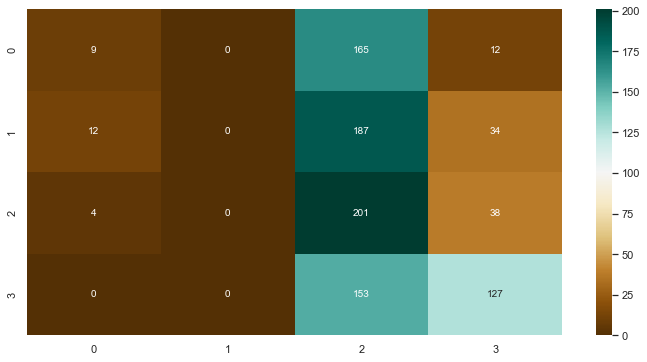

In [35]:
# error metrics
# calculate each error metric fr the model and expalin

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score

precision, recall, fscore, _ = score(y_test, y_pred, average = 'weighted')
accuracy = accuracy_score(y_test, y_pred)

print('Precision: ', round(precision, 2))
print('Recall: ', round(recall, 2))
print('F1 score: ', round(fscore, 2))
print('Accuracy: ', round(accuracy, 2))

# prepare and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BrBG')

In [36]:
# review classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.05      0.09       186
           2       0.00      0.00      0.00       233
           3       0.28      0.83      0.42       243
           4       0.60      0.45      0.52       280

    accuracy                           0.36       942
   macro avg       0.31      0.33      0.26       942
weighted avg       0.32      0.36      0.28       942



C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Commentary:

In general, the Logistic Regression does a poor job of classifying salary class based on Hollinger's Advanced Statistics. This could be for a number of reasons, including:

- salary (by contract) is usually determined by past performance. Player's sign contracts based on past output, and to a smaller extent, the teams idea/projection of their future output. 
- as a player's circumstances change (age, injuries) it may be more difficult to match previous statistical output/efficiency
- Changing Teams: how much of a player's statistical output is a function of the environment/system in which they were playing? 
- Advanced s Counting Stats: there are a large number of bench players, who's advanced statistics compare favorably in sall sample sizes, which could throw off salary predictions (the look like advanced stat stars in small sample, but are paid like the role players they are). Typically, in larger samples, their advanced stats regress to the level at which they're paid
- the performance of a large number of players in the NBA is essentially interchangeable. This can be seen in the classification report - the higher the salary class (higher end/Star Players) the better job the algorithm does of predicting salary class. 
    - You can see Recall (% of actual positive predicted correctly), and Precision (true positives relative to total positives, especailly in Class 4) 
    - can see overall accuracy metrics increasing in salary class 3 and 4
    
Maybe a different type of classifier (distance based as poopsed to linearly/probability based) will do a better job

#### KNN Classification

In [37]:
# will run a loop, simulating the KNN algorithm for k of 1 to 40, in order to check the 'best' value of k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(x_bc_train_s, y_train)
    
    y_pred_nn = knn.predict(x_bc_test_s)
    f1 = f1_score(y_pred_nn, y_test, average = 'weighted')
    f1_scores.append((k, round(f1, 4)))
    error = 1-round(accuracy_score(y_test, y_pred_nn), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 432x288 with 0 Axes>

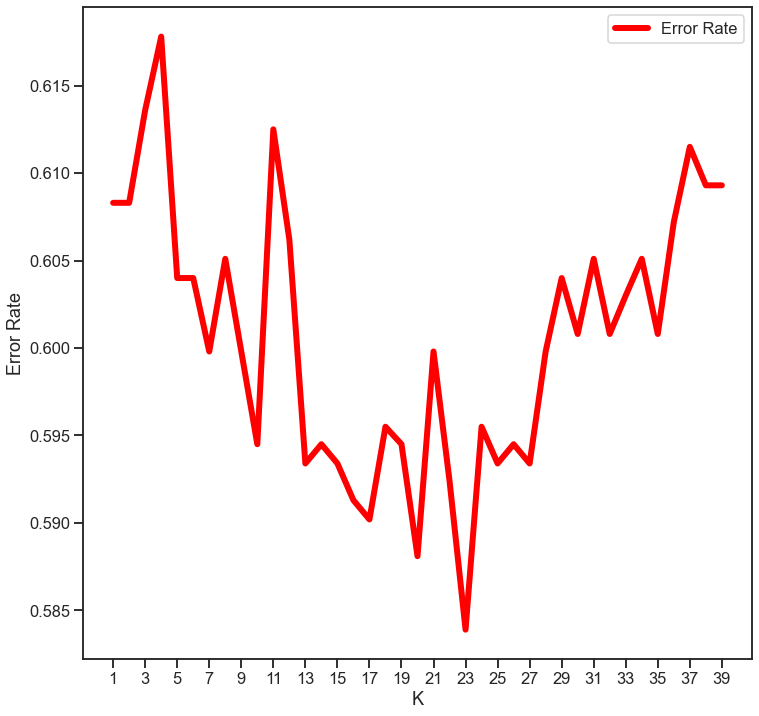

In [38]:
# plot the values to determine the best k (by error rate)
sns.set_context('talk')
sns.set_style('ticks')

fig = plt.figure()
ax = error_results.set_index('K').plot(color="red", figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))

In [39]:
# as seen from simulation, the best value for the k = 23
# re run the simulation a k = 23 to get best value for statistics
knn23 = KNeighborsClassifier(n_neighbors=23, weights='distance')
knn23 = knn23.fit(x_bc_train_s, y_train)
    
y_pred_23nn = knn23.predict(x_bc_test_s)

In [40]:
# print the classification  for k = 23
print(classification_report(y_test, y_pred_23nn))

              precision    recall  f1-score   support

           1       0.40      0.34      0.37       186
           2       0.35      0.31      0.33       233
           3       0.31      0.28      0.29       243
           4       0.53      0.67      0.59       280

    accuracy                           0.42       942
   macro avg       0.40      0.40      0.40       942
weighted avg       0.40      0.42      0.41       942



<AxesSubplot:>

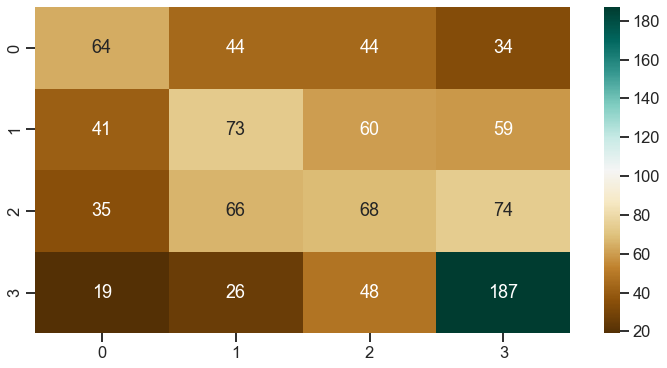

In [41]:
# compile and visually represent the confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_23nn)
fig = plt.figure(figsize = (12, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='BrBG')

Commentary: 

As seen, when compared to a Logistic Regression, the KNN estimate a little more accurately, especially at the lower salary grades (logistic regression's accuracy at the lower levels was essentially zero). Reasons for the difference between actuala nd predictions are the same for each model

- the KNN model classifies based on classifications of the (in this case) 23 closest neighbors. It appears to do a much better job of sifting through noise at lower salary classes, a little worse for salary class 3 and about the same for the Star Players
- it seems as if distance measureemnt/similarity looks like a better way of classifying on this data set. 

Next, we will attempt to classify via a SVM Hyperplane - both with a linear and kernel decision boundary

#### Support Vector Machine Classification

In [42]:
# linear svm classifier
from sklearn.svm import LinearSVC

# initialize model & train on entire data set:
lsvc = LinearSVC(max_iter = 10000)
lsvc = lsvc.fit(x_bc_train_s, y_train)
y_pred_lsvc = lsvc.predict(x_bc_test_s)

In [43]:
# print classification report
print(classification_report(y_test, y_pred_lsvc))

              precision    recall  f1-score   support

           1       0.37      0.38      0.37       186
           2       0.32      0.21      0.25       233
           3       0.33      0.19      0.24       243
           4       0.46      0.76      0.58       280

    accuracy                           0.40       942
   macro avg       0.37      0.38      0.36       942
weighted avg       0.37      0.40      0.37       942



<AxesSubplot:>

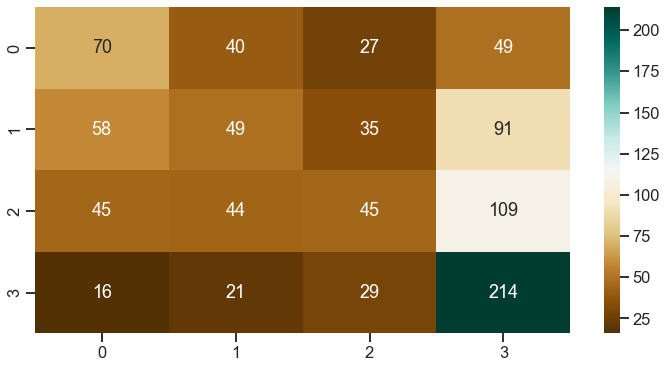

In [44]:
# compile and plot confusion matric
cm_lsvc = confusion_matrix(y_test, y_pred_lsvc)
fig = plt.figure(figsize = (12, 6))
sns.heatmap(cm_lsvc, annot=True, fmt='d', cmap='BrBG')

In [45]:
# kernel SVM classifier. Will iterate over a range of C, gamma
from sklearn.svm import SVC

gammas = [0.5, 1, 2]
cs = [0.1, 1, 10]

f1scores = []
errors = []

for c in cs:
    for gamma in gammas:
        gaussian_svm = SVC(kernel = 'rbf', gamma = gamma, C = c)
        gaussian_svm = gaussian_svm.fit(x_bc_train_s, y_train)
        y_pred_gsvm = gaussian_svm.predict(x_bc_test_s)
        
        # error metrics
        f1 = f1_score(y_pred_gsvm, y_test, average = 'weighted')
        f1scores.append((gamma, c, round(f1, 4)))
        error = 1-round(accuracy_score(y_test, y_pred_gsvm), 4)
        errors.append((gamma, c, error))
        
svm_f1 = pd.DataFrame(f1scores, columns=['gamma','C', 'F1 Score'])
svm_errors = pd.DataFrame(errors, columns = ['gamma', 'C', ' Error'])

In [46]:
# review svm_errors dataframe to get the best combination of gamma, C 
# appears to be the value of gamma = 0.5, C = 1.0
svm_errors

,gamma,C,Error
0,0.5,0.1,0.6868
1,1.0,0.1,0.7028
2,2.0,0.1,0.7028
3,0.5,1.0,0.5786
4,1.0,1.0,0.5924
5,2.0,1.0,0.6369
6,0.5,10.0,0.6338
7,1.0,10.0,0.6040
8,2.0,10.0,0.6316


In [47]:
# will re-run SVM Kernel at gamma = 0.5, C = 10 to determine classification accuracy
final_gaussian_svm = SVC(kernel = 'rbf', gamma = 0.5, C = 1.0)
final_gaussian_svm = final_gaussian_svm.fit(x_bc_train_s, y_train)
y_pred_final_gsvm = final_gaussian_svm.predict(x_bc_test_s)

 # error metrics
f1 = f1_score(y_pred_final_gsvm, y_test, average = 'weighted')
error = 1-round(accuracy_score(y_test, y_pred_final_gsvm), 4)
print('F1: ', f1)
print('Error: ', error)

F1:  0.42863935399910336
Error:  0.5786


In [48]:
# print contents of classification report
print(classification_report(y_test, y_pred_final_gsvm))

              precision    recall  f1-score   support

           1       0.44      0.29      0.35       186
           2       0.33      0.33      0.33       233
           3       0.32      0.34      0.33       243
           4       0.55      0.66      0.60       280

    accuracy                           0.42       942
   macro avg       0.41      0.40      0.40       942
weighted avg       0.42      0.42      0.41       942



<AxesSubplot:>

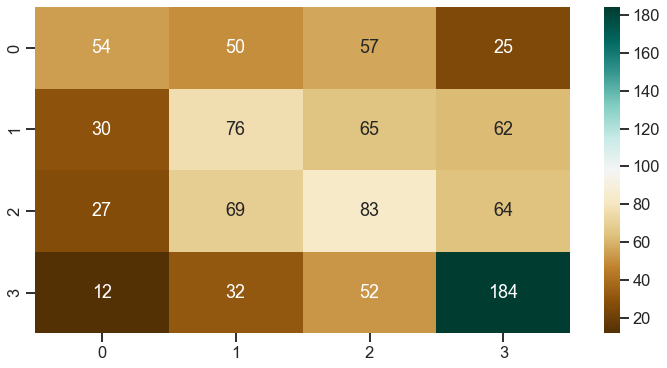

In [49]:
# compile and plot confusion matric
cm_gsvc = confusion_matrix(y_test, y_pred_final_gsvm)
fig = plt.figure(figsize = (12, 6))
sns.heatmap(cm_gsvc, annot=True, fmt='d', cmap='BrBG')

Commentary:

THe Gaussian SVC is a littl more accurate than the linear SVC. Overall, when comparing to the previous KNN model (k = 23), the overall accuracy measures do not change. However, the SVM is a little more accurate on Class 3 and 4, while KNN is a little more accurate on Class 1 and 2

Finally, we will attempt to classify via a Decision Tree, using the Bootstrapped Random Forest Model

In [50]:
print('Classification Report - KNN (k = 23)')
print(classification_report(y_test, y_pred_23nn))
print('-------------------------------------------------')
print('Classification Report - Gaussian SVM (gamma = 0.5, C = 1.0)')
print(classification_report(y_test, y_pred_final_gsvm))
print('-------------------------------------------------')
print('Classification Report - Linear SVM')
print(classification_report(y_test, y_pred_lsvc))

Classification Report - KNN (k = 23)
              precision    recall  f1-score   support

           1       0.40      0.34      0.37       186
           2       0.35      0.31      0.33       233
           3       0.31      0.28      0.29       243
           4       0.53      0.67      0.59       280

    accuracy                           0.42       942
   macro avg       0.40      0.40      0.40       942
weighted avg       0.40      0.42      0.41       942

-------------------------------------------------
Classification Report - Gaussian SVM (gamma = 0.5, C = 1.0)
              precision    recall  f1-score   support

           1       0.44      0.29      0.35       186
           2       0.33      0.33      0.33       233
           3       0.32      0.34      0.33       243
           4       0.55      0.66      0.60       280

    accuracy                           0.42       942
   macro avg       0.41      0.40      0.40       942
weighted avg       0.42      0.42     

#### Decision Tree / Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for number of trees
for n_trees in range(50, 1050, 50):
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(x_bc_train_s, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
50.0,0.622779
100.0,0.604100
150.0,0.601367
200.0,0.593622
250.0,0.589066
300.0,0.586788
350.0,0.590433
400.0,0.588610
450.0,0.584966


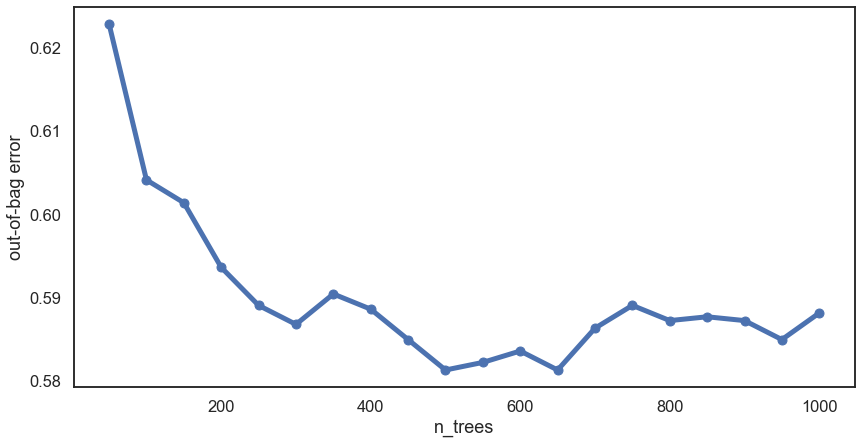

In [52]:
# from the simulation, it appears than ~500 trees is the optimal number
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [53]:
# re-run model with n_trees = 500
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

# get the predicted values
y_pred_rf = model.predict(x_bc_test_s)

In [54]:
# print contents of the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.39      0.31      0.34       186
           2       0.30      0.29      0.29       233
           3       0.33      0.28      0.30       243
           4       0.52      0.67      0.59       280

    accuracy                           0.40       942
   macro avg       0.39      0.39      0.38       942
weighted avg       0.39      0.40      0.39       942



<AxesSubplot:>

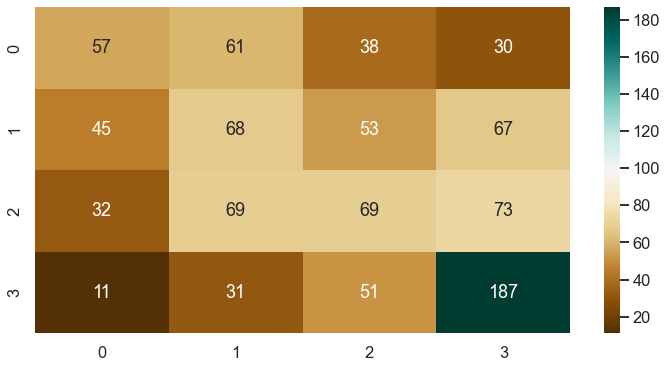

In [55]:
# compute and plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig = plt.figure(figsize = (12, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='BrBG')

In [56]:
# Summarizing all of the classification Reports
print('Classification Report - Logistic Regression')
print(classification_report(y_test, y_pred))
print('-------------------------------------------------')
print('Classification Report - KNN (k = 23)')
print(classification_report(y_test, y_pred_23nn))
print('-------------------------------------------------')
print('Classification Report - Gaussian SVM (gamma = 0.5, C = 1.0)')
print(classification_report(y_test, y_pred_final_gsvm))
print('-------------------------------------------------')
print('Classification Report - Random Forest (n_trees = 500)')
print(classification_report(y_test, y_pred_rf))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           1       0.36      0.05      0.09       186
           2       0.00      0.00      0.00       233
           3       0.28      0.83      0.42       243
           4       0.60      0.45      0.52       280

    accuracy                           0.36       942
   macro avg       0.31      0.33      0.26       942
weighted avg       0.32      0.36      0.28       942

-------------------------------------------------
Classification Report - KNN (k = 23)
              precision    recall  f1-score   support

           1       0.40      0.34      0.37       186
           2       0.35      0.31      0.33       233
           3       0.31      0.28      0.29       243
           4       0.53      0.67      0.59       280

    accuracy                           0.42       942
   macro avg       0.40      0.40      0.40       942
weighted avg       0.40      0.42      0.41       942


C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Commentary:

The use of a Random forest classification algorithm did not provide any performance improvement over the KNN or Gaussian SVM. Reasons for the relatively poor performance are as per the previous comments. 

In general, a ranking of the most effective algorithms to predcit salary class based on Hollinger's Advanced NBA Stats are:

1. Gaussian SVM / KNN 
2. Random Forest
3. Logistic Regression

Based on the dataset, it seems that similarity/distance measures are more effective in classifying on this data set than modified linear probability (Logistic Regression) or information theory based (Random Forest) systems. It should be noted, for reason previously discussed, that neither does a great job of classifying on the data